In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from PIL import Image
from random import randint

In [40]:
colourMaps = {
    0 : COLORMAP_AUTUMN,
    1 : "cv2.COLORMAP_BONE",
    2 : "cv2.COLORMAP_JET",
    3 : "cv2.COLORMAP_WINTER",
    4 : "cv2.COLORMAP_RAINBOW",
    5 : "cv2.COLORMAP_OCEAN",
    6 : "cv2.COLORMAP_SUMMER",
    7 : "cv2.COLORMAP_SPRING",
    8 : "cv2.COLORMAP_COOL",
    9 : "cv2.COLORMAP_HSV",
    10 : "cv2.COLORMAP_PINK",
    11 : "cv2.COLORMAP_HOT"
}

In [55]:
def line_enhancement(imgBase, imgBody, edgeMethod,alpha = 0.1, map = randint(0,11)):
    if(edgeMethod == "laplacian"):
        edgeImg = cv2.Laplacian(imgBase,cv2.CV_8U)
    if(edgeMethod == "sobelX"):
        edgeImg = cv2.Sobel(imgBase,cv2.CV_8U,1,0,ksize=5)
    else:
        edgeImg = cv2.Sobel(imgBase,cv2.CV_8U,0,1,ksize=5)

    height, width = imgBase.shape[:2]
    imgBody =cv2.resize(imgBody,(width,height))

    beta=1-alpha
    gamma=0
    dst = np.uint8(alpha*(edgeImg)+beta*(imgBody))
    dst = cv2.applyColorMap(dst,cv2.COLORMAP_HSV)
    plt.subplot(121), plt.imshow(dst)
    return dst

In [64]:
def colourise_base(imgBase, imgBody, edgeMethod,alpha = 0.1):
    if(edgeMethod == "laplacian"):
        edgeImg = cv2.Laplacian(imgBase,cv2.CV_8U)
    if(edgeMethod == "sobelX"):
        edgeImg = cv2.Sobel(imgBase,cv2.CV_8U,1,0,ksize=5)
    if(edgeMethod == "sobelY"):
        edgeImg = cv2.Sobel(imgBase,cv2.CV_8U,0,1,ksize=5)

    height, width = imgBase.shape[:2]
    imgBody =cv2.resize(imgBody,(width,height))
    edgeImg = cv2.applyColorMap(edgeImg,cv2.COLORMAP_HSV)
    beta=1-alpha
    gamma=0
    dst = np.uint8(alpha*(edgeImg)+beta*(imgBody))
    plt.subplot(121), plt.imshow(dst)
    return dst

True

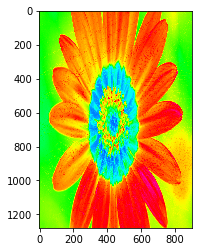

In [68]:
img1 = cv2.imread("Strong-Lines-San-Francisco.jpg")
img2 = cv2.imread("flowers.jpg")
output = line_enhancement(img1,img2,"laplacian")
# output = colourise_base(img2,img1,"laplacian")
cv2.imwrite("flower_sanfranlines.png",output)